1/5
2/5
3/5
4/5
5/5


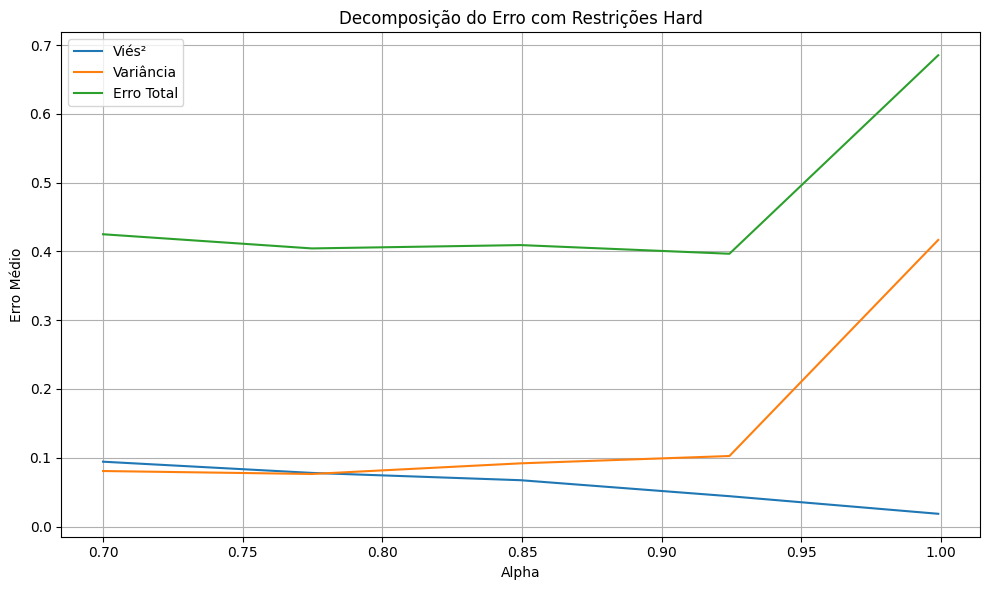

In [ ]:
# Reimportação após reset de ambiente
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

# Função verdadeira
def f_true(x):
    return 2 * x + np.cos(4 * np.pi * x)

# Base polinomial
def poly_basis(x, degree):
    return np.vstack([x**k for k in range(degree + 1)]).T

# Parâmetros gerais
np.random.seed(42)
n_samples = 25
n_datasets = 100
n_test_points = 20
noise_std = 0.5
M = 1.0e3
degree = 71
alpha_values = np.linspace(0.5, 1, 20)

# Pontos de teste
x_test_points = np.random.rand(n_test_points)
X_test = poly_basis(x_test_points, degree)
f_real = f_true(x_test_points)

# Armazenar erros
bias2_list = []
var_list = []
noise_list = []

# Loop sobre alphas
cnt = 0
for alpha in alpha_values:
    preds = []
    cnt += 1
    print(f"{cnt}/{len(alpha_values)}")
    for _ in range(n_datasets):
        # Dados sintéticos
        X_raw = np.linspace(0, 1, n_samples)
        y = f_true(X_raw) + np.random.normal(0, noise_std, n_samples)
        X_design = poly_basis(X_raw, degree)

        # Restrições hard
        lower_bounds = [-M * alpha**k for k in range(degree + 1)]
        upper_bounds = [ M * alpha**k for k in range(degree + 1)]
        bounds = Bounds(lower_bounds, upper_bounds)

        # Otimização
        res = minimize(lambda a: np.mean((y - X_design @ a) ** 2),
                       x0=np.zeros(degree + 1),
                       bounds=bounds)
        
        a_opt = res.x
        y_pred = X_test @ a_opt
        preds.append(y_pred)

    preds = np.array(preds)

    # Erros
    bias2 = np.mean((np.mean(preds, axis=0) - f_real) ** 2)
    var = np.mean(np.var(preds, axis=0))
    noise = noise_std ** 2

    bias2_list.append(bias2)
    var_list.append(var)
    noise_list.append(noise)

# Plot dos erros
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, bias2_list, label='Viés²')
plt.plot(alpha_values, var_list, label='Variância')
plt.plot(alpha_values, np.array(bias2_list) + np.array(var_list) + noise_list, label='Erro Total')
plt.xlabel('Alpha')
plt.ylabel('Erro Médio')
plt.title('Decomposição do Erro com Restrições Hard')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

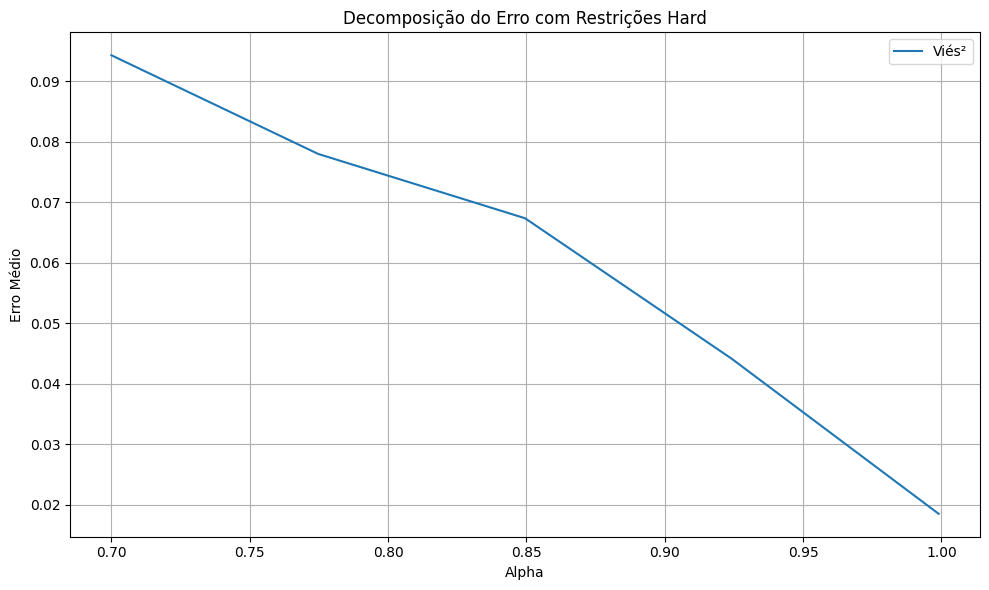

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, bias2_list, label='Viés²')
# plt.plot(alpha_values, var_list, label='Variância')
# plt.plot(alpha_values, np.array(bias2_list) + np.array(var_list) + noise_list, label='Erro Total')
plt.xlabel('Alpha')
plt.ylabel('Erro Médio')
plt.title('Decomposição do Erro com Restrições Hard')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

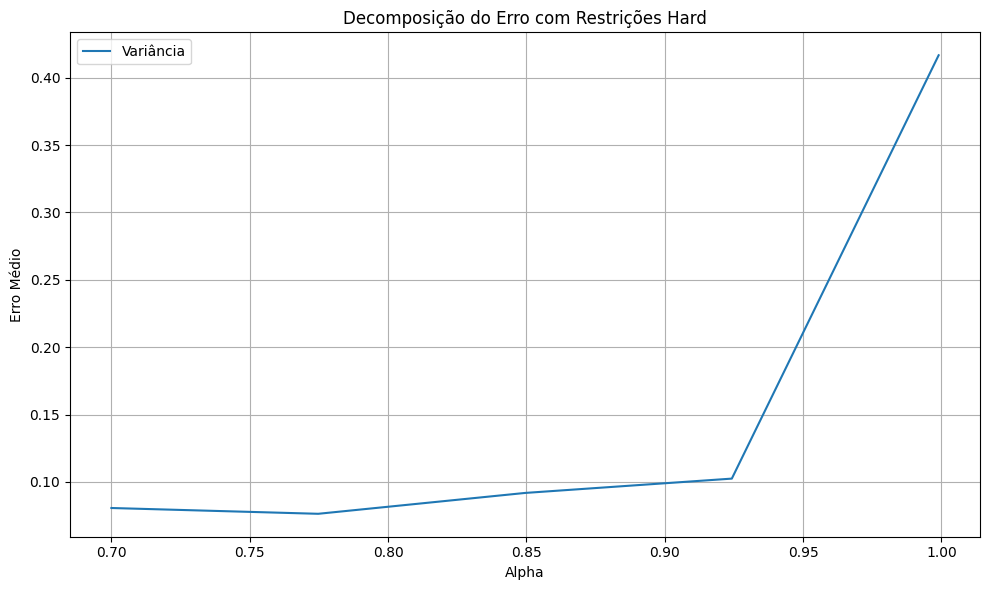

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, var_list, label='Variância')
plt.xlabel('Alpha')
plt.ylabel('Erro Médio')
plt.title('Decomposição do Erro com Restrições Hard')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

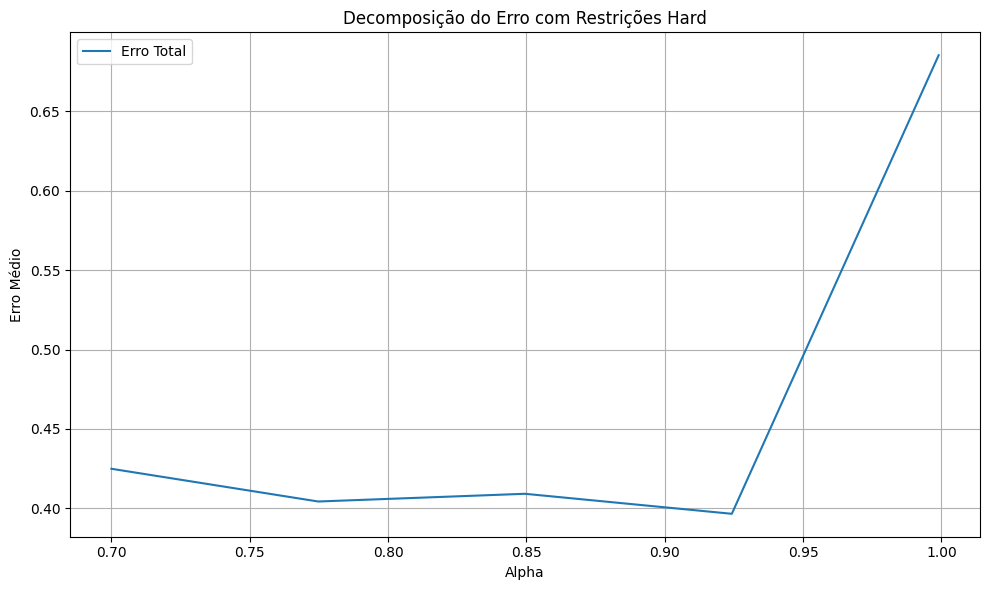

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, np.array(bias2_list) + np.array(var_list) + noise_list, label='Erro Total')
plt.xlabel('Alpha')
plt.ylabel('Erro Médio')
plt.title('Decomposição do Erro com Restrições Hard')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()